In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the raw dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]

df = pd.read_csv(url, names=columns, na_values="?")

# Quick cleanup (Drop rows with missing Price/Horsepower for this assignment)
df = df.dropna(subset=['price', 'horsepower', 'peak-rpm'])
print(f"Dataset Loaded. Shape: {df.shape}")

Dataset Loaded. Shape: (199, 26)


In [32]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [2]:
print("\nColumn Information:")
print(f"make: {df['make'].dtype}")
print(f"num-of-doors: {df['num-of-doors'].dtype}")
print(f"engine-size: {df['engine-size'].dtype}")
print(f"symboling: {df['symboling'].dtype}")


Column Information:
make: object
num-of-doors: object
engine-size: int64
symboling: int64


In [3]:
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 199, dtype: object

# Qualitative
# Nominal
Car brand names have no natural order

In [4]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 199, dtype: object

# Qualitative
# Ordinal
Categories (two, four) have logical order

In [6]:
df['engine-size'].head(10)

0     130
1     130
2     152
3     109
4     136
5     136
6     136
7     136
8     131
10    108
Name: engine-size, dtype: int64

# Quantitative
# ratio
True zero exists; ratios are meaningful

In [8]:
df['symboling'].head(30)

0     3
1     3
2     1
3     2
4     2
5     2
6     1
7     1
8     1
10    2
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    2
19    1
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28   -1
29    3
30    2
Name: symboling, dtype: int64

# Qualitative
# Ordinal
vehicle symboling is considered an Ordinal or Interval scale rather than a Ratio scale because it lacks a true (absolute) zero point

## Part two 

In [11]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]


print(f"Mean price = {mean_price}")
print(f"Median price = {median_price}")
print(f"Mode price = {mode_price}")



Mean price = 13243.43216080402
Median price = 10345.0
Mode price = 5572.0


In [12]:
if(mean_price>mode_price):
    print("Mean price is more then median price")

Mean price is more then median price


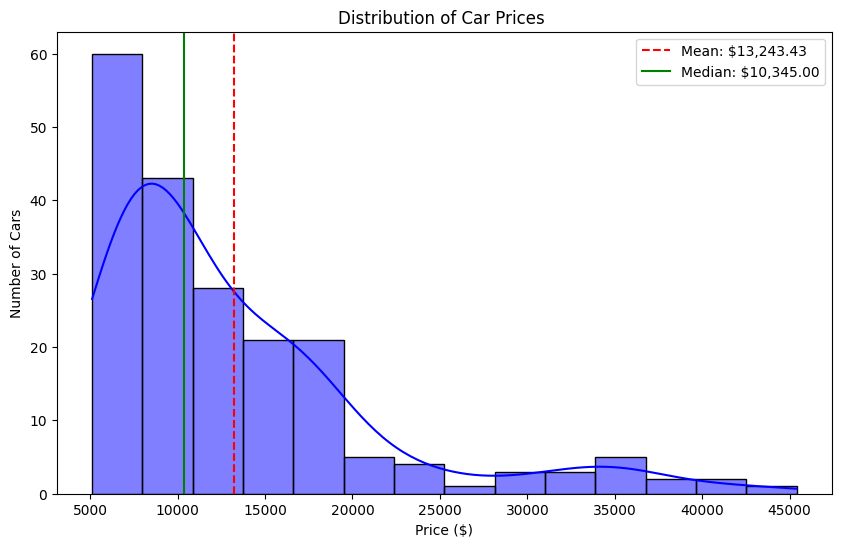

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:,.2f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'Median: ${median_price:,.2f}')

plt.title('Distribution of Car Prices ')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()

# A few expensive cars pull the average upward

# Coefficient of Variation (CV)


In [19]:
cv_price = df['price'].std() / df['price'].mean()
cv_hp = df['horsepower'].std() / df['horsepower'].mean()

cv_price, cv_hp


(np.float64(0.6024652455516947), np.float64(0.3632005588287791))

we can see that cv_price > cv_hp 
so Price is more voltile then horsepower

# Part 3: Shape & Distribution

# 1

In [21]:
df['engine-size'].skew(),df['engine-size'].kurtosis()

(np.float64(1.9735956839887074), np.float64(5.426683661534259))

Skewness is positive so it's right skewed

so it's not a normal distribution

# 2

## boxplot ##

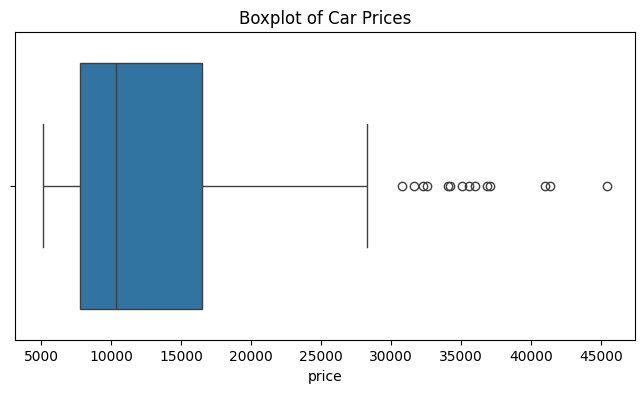

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.show()


# 3 Findin outlier using IQR

In [29]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)

IQR=Q3-Q1

upper_bound=Q3+IQR*1.5
lower_bound=Q1-IQR*1.5
outliers=df[df['price']>upper_bound][['make','price']]
outliers.sort_values(by='make',ascending=True)

,make,price
15,bmw,30760.0
16,bmw,41315.0
17,bmw,36880.0
47,jaguar,32250.0
48,jaguar,35550.0
49,jaguar,36000.0
70,mercedes-benz,31600.0
71,mercedes-benz,34184.0
72,mercedes-benz,35056.0
73,mercedes-benz,40960.0


# Part 4: The "CMO vs. Engineer" Debate (Correlation)

# 1

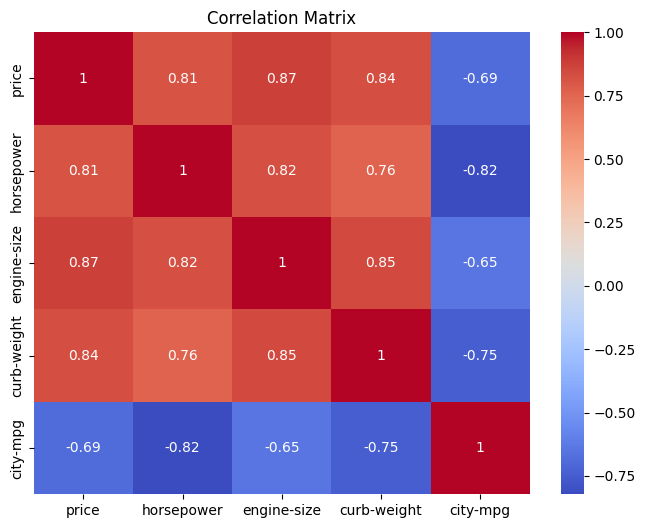

In [30]:
corr_cols = ['price', 'horsepower', 'engine-size', 'curb-weight', 'city-mpg']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 2

horsepower dosen't have the strogest corelation it has 0.81

relationship between city-mpg and price is negative

# 3 regrasion cheak

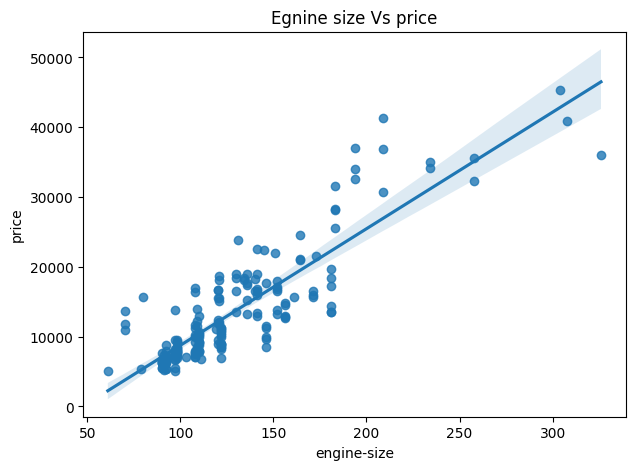

In [34]:
plt.figure(figsize=(7,5))
sns.regplot(x='engine-size',y='price',data=df)
plt.title('Egnine size Vs price')
plt.show()

Yes it is look like linar relationship

